Easy
Оценить сбалансированность классов.

Удалить пунктуацию из датасета.

Преобразовать датасет в BOW или TF-IDF, поделить на треин-тест и спрогнозировать вашей любимой моделью

In [10]:
import numpy as np
import pandas as pd

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_excel('sample_data/birulevo sentiment coded.xlsx', index_col=0)
df.columns

Index(['tweet', 'SENTIMENT', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], dtype='object')

In [13]:
df1 = df.drop(['Unnamed: 3','Unnamed: 4', 'Unnamed: 5'], axis=1)
df1

,tweet,SENTIMENT
user,,
NaN,NaN,NaN
BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1
White_technolog,у районной управы собираются местные жители #б...,2
White_technolog,“@tvrain: тем временем конная полиция добралас...,2
White_technolog,в центре появились тощие прыщавые мужичонки с ...,3
...,...,...
GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2
Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2
Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3


In [14]:
df2 = df1.dropna()
df2

,tweet,SENTIMENT
user,,
BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1
White_technolog,у районной управы собираются местные жители #б...,2
White_technolog,“@tvrain: тем временем конная полиция добралас...,2
White_technolog,в центре появились тощие прыщавые мужичонки с ...,3
White_technolog,"как пишет товарищ в смс, на площади революции ...",3
...,...,...
GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2
Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2
Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3


In [15]:
df2.loc[df2['SENTIMENT'] == 'IRR', 'SENTIMENT'] = 2
df2.tweet = df2.tweet.astype('string')
df2['SENTIMENT'].astype(str).astype(int)
#df2['tweet'].astype(str)
#df2.head()
df2.dtypes


tweet        string
SENTIMENT    object
dtype: object

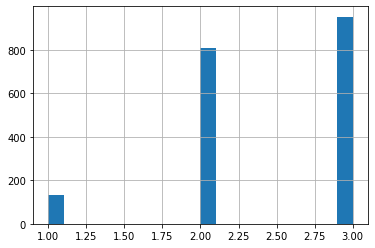

In [16]:
df2.SENTIMENT.hist(bins=20)

In [17]:
import re
p = re.compile(r'[^\w\s]+')
df2['tweet'] = [p.sub('', x) for x in df2['tweet'].tolist()]


In [18]:
from porter import Porter

In [19]:
def preprocess_word(word):
    return Porter.stem(word)

In [20]:
def preprocess_corpus(corpus):
    return [' '.join(map(preprocess_word, text.split())) for text in corpus]

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
corpus = df2['tweet']
stemmed_corpus = [' '.join(map(preprocess_word, text.split())) for text in corpus]


In [23]:
bow = CountVectorizer()
bow_result = bow.fit_transform(stemmed_corpus).toarray()
df_r = pd.DataFrame(bow_result, columns=bow.get_feature_names(), index=corpus)
df_r

,000,10,100,1000,1000000,100тысчеловек,11,1100,12,1200,13,1300,13102013,137,13летн,14,146,15,150,1500,15102013,16,17,1731,1735,1737,1746,1748,1749,1750,1756,18,1816,1823,1825,1827,1831,1835,1839,1900,...,эпицентр,эстафет,эт,этн,этнич,этническ,этноконфликт,этнопреступн,этот,эфир,эффективн,эх,юа,юаомоскв,юг,югорск,югр,южн,юл,юнош,юр,юридическ,юрисдикциюнов,яв,явлен,явля,явн,ягуар,яд,язык,языкехаркаютгд,яйц,якеменк,якоб,якунин,январ,яндекспробок,яров,ярост,яс
tweet,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
в вост бирюлево на одну палатку с кошатиной стало меньше live,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
у районной управы собираются местные жители бирюлево live whitepower,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tvrain тем временем конная полиция добралась до бирюлева pictwittercomblrf074rmj бирюлево live бунт,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
в центре появились тощие прыщавые мужичонки с красными повязками дружинник live бунт москва бирюлево,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
как пишет товарищ в смс на площади революции черным черно в смысле орды черножопых live бирюлево москва,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
наш корр dmitryhorse ведет трансляцию из бирюлево,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gazetaru мид ответил на заявление германии о беспорядках в бирюлево httpwwwgazetarusocialnews20131019n_3265197shtmlutm_sourcegoogleamputm_mediumbanneramputm_campaignnews германия,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
rt_russian азербайджанские радикалы пригрозили принять меры против русских в баку httprussianrtcomarticle16970 бирюлево,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df_all = pd.merge(df2,df_r, on='tweet')


In [25]:
df_all.index = df_all['tweet'] 
dff = df_all.drop(['tweet'], axis=1)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
y_df = dff[['SENTIMENT']]
x_df = dff.drop(['SENTIMENT'], axis=1)

In [28]:
x = x_df
y = y_df
y=y.astype('int')

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train.shape, x_test.shape

((1657, 5076), (415, 5076))

In [30]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score (y_test, y_pred)

0.7325301204819277

Normal
Удалить стоп-слова из датасета, использовать стеммер Портера (лежит в src/porter.py). Использовать пайплайн для TF-IDF и модели машинного обучения. Подобрать параметры. Сравнить качество нескольких моделей.

In [ ]:
df2.head()

,tweet,SENTIMENT,tweet_clean
user,,,
BorisALV,в вост бирюлево на одну палатку с кошатиной ст...,1,в вост бирюлево на одну палатку с кошатиной ст...
White_technolog,у районной управы собираются местные жители би...,2,у районной управы собираются местные жители би...
White_technolog,tvrain тем временем конная полиция добралась д...,2,tvrain тем временем конная полиция добралась д...
White_technolog,в центре появились тощие прыщавые мужичонки с ...,3,в центре появились тощие прыщавые мужичонки с ...
White_technolog,как пишет товарищ в смс на площади революции ч...,3,как пишет товарищ в смс на площади революции ч...


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
from nltk.corpus import stopwords
sp = stopwords.words("russian")

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
Tf = TfidfVectorizer(stop_words=sp)
tf_result = Tf.fit_transform(stemmed_corpus).toarray()
df_t = pd.DataFrame(tf_result, columns=Tf.get_feature_names(), index=corpus)
df_t

,000,10,100,1000,1000000,100тысчеловек,11,1100,12,1200,13,1300,13102013,137,13летн,14,146,15,150,1500,15102013,16,17,1731,1735,1737,1746,1748,1749,1750,1756,18,1816,1823,1825,1827,1831,1835,1839,1900,...,эпатир,эпицентр,эстафет,эт,этн,этнич,этническ,этноконфликт,этнопреступн,эфир,эффективн,эх,юа,юаомоскв,юг,югорск,югр,южн,юл,юнош,юр,юридическ,юрисдикциюнов,яв,явлен,явля,явн,ягуар,яд,язык,языкехаркаютгд,яйц,якеменк,якоб,якунин,январ,яндекспробок,яров,ярост,яс
tweet,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
в вост бирюлево на одну палатку с кошатиной стало меньше live,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
у районной управы собираются местные жители бирюлево live whitepower,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tvrain тем временем конная полиция добралась до бирюлева pictwittercomblrf074rmj бирюлево live бунт,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
в центре появились тощие прыщавые мужичонки с красными повязками дружинник live бунт москва бирюлево,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
как пишет товарищ в смс на площади революции черным черно в смысле орды черножопых live бирюлево москва,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
наш корр dmitryhorse ведет трансляцию из бирюлево,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gazetaru мид ответил на заявление германии о беспорядках в бирюлево httpwwwgazetarusocialnews20131019n_3265197shtmlutm_sourcegoogleamputm_mediumbanneramputm_campaignnews германия,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rt_russian азербайджанские радикалы пригрозили принять меры против русских в баку httprussianrtcomarticle16970 бирюлево,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [33]:
df_all2 = pd.merge(df2,df_t, on='tweet')
df_all2.index = df_all2['tweet'] 
dff2 = df_all2.drop(['tweet'], axis=1)

In [34]:
y1_df = dff2[['SENTIMENT']]
x1_df = dff2.drop(['SENTIMENT'], axis=1)

In [35]:
x = x1_df
y = y1_df
y=y.astype('int')

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train.shape, x_test.shape

((1657, 5010), (415, 5010))

In [38]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
accuracy_score (y_test, y_pred)

0.7132530120481928

In [40]:
print ('Качество TF-IDF с удалением стоп-слов получилось хуже чем BOW')

Качество TF-IDF с удалением стоп-слов получилось хуже чем BOW


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [44]:
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", LogisticRegression()),
    ]
)

In [48]:
df_all2['SENTIMENT'] = pd.Categorical(df_all2['SENTIMENT'])
df_all2['SENTIMENT_code'] = df_all2.SENTIMENT.cat.codes

In [49]:
pipeline.fit(df_all2['tweet'], df_all2['SENTIMENT'])

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [53]:
df_all2['tweet'].iloc[11:27]

tweet
бирюлевский убийца зейналов рвется на свободу httpbitly16jkdua бирюлево москва moscow russia news                      бирюлевский убийца зейналов рвется на свободу ...
бирюлевский убийца зейналов рвется на свободу httpbitly16jkdua бирюлево москва moscow russia news                      бирюлевский убийца зейналов рвется на свободу ...
бирюлевский убийца зейналов рвется на свободу httpbitly16jkdua бирюлево москва moscow russia news                      бирюлевский убийца зейналов рвется на свободу ...
бирюлевский убийца зейналов рвется на свободу httpbitly16jkdua бирюлево москва moscow russia news                      бирюлевский убийца зейналов рвется на свободу ...
в бирюлево найден убитым гражданин узбекистана httpbitly17syck9 news                                                   в бирюлево найден убитым гражданин узбекистана...
зейналов в разговорах с полицейскими признал вину  мвд news бирюлево                                                   зейналов в разговорах с полице

In [56]:
pipeline.predict(df_all2['tweet'].iloc[11:27])

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])